## Task-D: Collinear features and their effect on linear models

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.metrics import accuracy_score,roc_auc_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import math
import random

In [5]:
data = pd.read_csv('/content/drive/MyDrive/temp/Linear model/task_d.csv')

In [6]:
data.tail()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
95,0.358663,-0.207835,0.928390,0.300024,-0.207835,0.382111,1.716476,1
96,0.358663,-0.417770,0.928390,0.300024,-0.417770,0.382111,1.841269,1
97,1.141771,-0.417770,0.997724,1.130131,-0.417770,1.137586,0.019860,1
98,-0.581066,-1.257507,0.096375,-0.604025,-1.257507,-0.531992,0.590582,1
99,0.358663,-0.627704,0.859055,0.300024,-0.627704,0.373740,-0.045364,1


In [11]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values



                  x         y         z  ...  2*z+3*x*x         w    target
x          1.000000 -0.205926  0.812458  ...   0.996252  0.583277  0.728290
y         -0.205926  1.000000 -0.602663  ...  -0.261123 -0.401790 -0.690684
z          0.812458 -0.602663  1.000000  ...   0.847163  0.674486  0.969990
x*x        0.997947 -0.209289  0.807137  ...   0.997457  0.583803  0.719570
2*y       -0.205926  1.000000 -0.602663  ...  -0.261123 -0.401790 -0.690684
2*z+3*x*x  0.996252 -0.261123  0.847163  ...   1.000000  0.606860  0.764729
w          0.583277 -0.401790  0.674486  ...   0.606860  1.000000  0.641750
target     0.728290 -0.690684  0.969990  ...   0.764729  0.641750  1.000000

[8 rows x 8 columns]


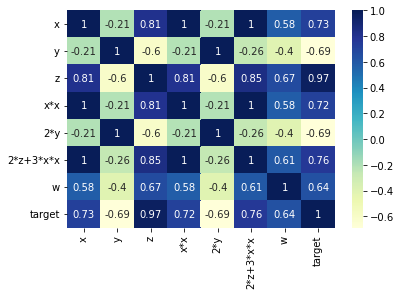

In [8]:
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

### Doing perturbation test to check the presence of collinearity

> Indented block



#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

100%|██████████| 9/9 [00:00<00:00, 196.44it/s]


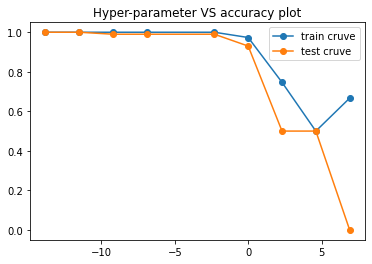

best_model_accuracy= 0.52
feature weights= [[ 0.03244351 -0.03153831  0.0440694   0.03200811 -0.03153831  0.03412819
   0.02862859]]
best_model_accuracy_edited= 0.51
feature weights_edited= [[ 0.03187996 -0.0322185   0.04350955  0.03144423 -0.0322185   0.03356671
   0.02805848]]
differene_between_accuracy= -0.010000000000000009
[array([0.00056355, 0.00068019, 0.00055985, 0.00056389, 0.00068019,
       0.00056148, 0.00057011])]
abs_change_in_weights= [0.00056355 0.00068019 0.00055985 0.00056389 0.00068019 0.00056148
 0.00057011]
[2 5 0 3 6 1 4]
sorted index according to abs weights= [4 1 6 3 0 5 2]
Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')
top4_feature_change ['2*y', 'y', 'w', 'x*x']


In [16]:
def RandomSearchCV(x,y, params, folds):
 trainscores = [] #list to store train score for each value of k
 testscores = [] #list to store test score for each value of k
 for k in tqdm(params):

  trainscores_folds = [] #list to store train score for each fold
  testscores_folds = [] #list to store test score for each fold
  for j in range(0, folds):
     # check this out: https://stackoverflow.com/a/9755548/4084039
     #train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
     #test_indices = list(set(list(range(1, len(x_train)))) - set(train_indices))
     list1=[*range(1,len(x)+1)]# list of all indices in x
     list2=np.array(list1)# converting it to np array
     splited_array=np.array_split(list2,folds) #splitting x to in f folds
     test_indice =splited_array[j]
     train_indice=list(set(list(range(1,len(x)+1))) - set(test_indice))#getting index for all points of train
     test_indices=[x -1 for x in test_indice ] #subtracting each index by one as original index of x start with 0
     train_indices=[x -1 for x in train_indice ]#subtracting each index by one asoriginal index of x start with 0
     # selecting the data points based on the train_indices and test_indices
     X_train = x[train_indices]
     Y_train = y[train_indices]
     X_test = x[test_indices]
     Y_test = y[test_indices]
     c = k
     classifier=SGDClassifier(loss='log',penalty='l2', alpha=c, l1_ratio=0.15,
                                fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                                verbose=0, epsilon=0.1, n_jobs=None, random_state=None, 
                                learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                                validation_fraction=0.1, n_iter_no_change=5, class_weight=None, 
                                warm_start=False, average=False)
     classifier.fit(X_train,Y_train)
     Y_predicted = classifier.predict(X_test)#predict y of X_test
  
     testscores_folds.append(accuracy_score(Y_test, Y_predicted))
     Y_predicted = classifier.predict(X_train)#predict y of X_train
     trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
  trainscores.append(np.mean(np.array(trainscores_folds)))
  testscores.append(np.mean(np.array(testscores_folds)))
 return trainscores,testscores
#model = LogisticRegression() #define classifier
#list3=[*range(1,1000)]
#param=random.sample(list3,10) #generating 10 random number betwwn 1 to 50
param=[0.000001,0.00001,0.0001,0.001,0.1,1,10,100,1000]
param1=[]
for i in param:
    tmp=math.log(i)
    param1.append(tmp)

params=[param.sort()]

folds = 4
trainscores,testscores = RandomSearchCV(X, Y, param, folds)


plt.plot(param1,trainscores, 'o-',label='train cruve')
plt.plot(param1,testscores,'o-', label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

bestmodel=SGDClassifier(loss='log',penalty='l2', alpha=10, l1_ratio=0.15,
                                fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                                verbose=0, epsilon=0.1, n_jobs=None, random_state=None, 
                                learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                                validation_fraction=0.1, n_iter_no_change=5, class_weight=None, 
                                warm_start=False, average=False)
bestmodel.fit(X,Y)
Y_predicted = bestmodel.predict(X)#predict y of X_test
best_model_accuracy=accuracy_score(Y, Y_predicted)
bestmodelcoef=bestmodel.coef_
print("best_model_accuracy=",best_model_accuracy)
print("feature weights=",bestmodelcoef)

X_=X+random.randrange(1,10)*0.01
bestmodel.fit(X_,Y)
Y_predicted = bestmodel.predict(X)#predict y of X_test
best_model_accuracy_edited=accuracy_score(Y, Y_predicted)
bestmodelcoef_edited=bestmodel.coef_
print("best_model_accuracy_edited=",best_model_accuracy_edited)
print("feature weights_edited=",bestmodelcoef_edited)

differene_between_accuracy=best_model_accuracy_edited-best_model_accuracy
print("differene_between_accuracy=",differene_between_accuracy)
list3=[abs(i-j) for i,j in zip(bestmodelcoef,bestmodelcoef_edited)]
print(list3)
list4=list3[0]
list4=np.array(list4)
print("abs_change_in_weights=",list4)
print(np.argsort(list4))
list_sorted=np.argsort(list4)[::-1]
print("sorted index according to abs weights=",list_sorted)
col_list=data.columns
print(col_list)
top4_feature_change=[]
for i in list_sorted[0:4]:
    top4_feature_change.append(col_list[i])
print("top4_feature_change",top4_feature_change)    

100%|██████████| 9/9 [00:00<00:00, 220.21it/s]


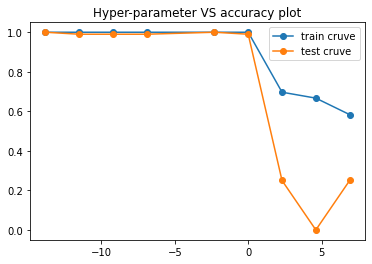

best_model_accuracy= 0.63
feature weights= [[ 0.06749926 -0.06755077  0.09295556  0.06704618 -0.06755077  0.07156491
   0.05872509]]
best_model_accuracy_edited= 0.61
feature weights_edited= [[ 0.06717658 -0.0661877   0.0924363   0.06671768 -0.0661877   0.07120013
   0.05817939]]
differene_between_accuracy= -0.020000000000000018
[array([0.00032268, 0.00136307, 0.00051926, 0.0003285 , 0.00136307,
       0.00036478, 0.0005457 ])]
abs_change_in_weights= [0.00032268 0.00136307 0.00051926 0.0003285  0.00136307 0.00036478
 0.0005457 ]
[0 3 5 2 6 1 4]
sorted index according to abs weights= [4 1 6 2 5 3 0]
Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')
top4_feature_change ['2*y', 'y', 'w', 'z']


In [20]:
def RandomSearchCV(x,y, params, folds):
 trainscores = [] #list to store train score for each value of k
 testscores = [] #list to store test score for each value of k
 for k in tqdm(params):
  
  trainscores_folds = [] #list to store train score for each fold
  testscores_folds = [] #list to store test score for each fold
  for j in range(0, folds):
     # check this out: https://stackoverflow.com/a/9755548/4084039
     #train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
     #test_indices = list(set(list(range(1, len(x_train)))) - set(train_indices))
     list1=[*range(1,len(x)+1)]# list of all indices in x
     list2=np.array(list1)# converting it to np array
     splited_array=np.array_split(list2,folds) #splitting x to in f folds
     test_indice =splited_array[j]
     train_indice=list(set(list(range(1,len(x)+1))) - set(test_indice))#getting index for all points of train
     test_indices=[x -1 for x in test_indice ] #subtracting each index by one as original index of x start with 0
     train_indices=[x -1 for x in train_indice ]#subtracting each index by one asoriginal index of x start with 0
     # selecting the data points based on the train_indices and test_indices
     X_train = x[train_indices]
     Y_train = y[train_indices]
     X_test = x[test_indices]
     Y_test = y[test_indices]
     c = k
     classifier=SGDClassifier(loss='hinge',penalty='l2', alpha=c, l1_ratio=0.15,
                                fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                                verbose=0, epsilon=0.1, n_jobs=None, random_state=None, 
                                learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                                validation_fraction=0.1, n_iter_no_change=5, class_weight=None, 
                                warm_start=False, average=False)
     classifier.fit(X_train,Y_train)
     Y_predicted = classifier.predict(X_test)#predict y of X_test
  
     testscores_folds.append(accuracy_score(Y_test, Y_predicted))
     Y_predicted = classifier.predict(X_train)#predict y of X_train
     trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
  trainscores.append(np.mean(np.array(trainscores_folds)))
  testscores.append(np.mean(np.array(testscores_folds)))
 return trainscores,testscores
#model = LogisticRegression() #define classifier
#list3=[*range(1,1000)]
#param=random.sample(list3,10) #generating 10 random number betwwn 1 to 50
param=[0.000001,0.00001,0.0001,0.001,0.1,1,10,100,1000]
param1=[]
for i in param:
    tmp=math.log(i)
    param1.append(tmp)

params=[param.sort()]

folds = 4
trainscores,testscores = RandomSearchCV(X, Y, param, folds)

plt.plot(param1,trainscores, 'o-',label='train cruve')
plt.plot(param1,testscores,'o-', label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

bestmodel=SGDClassifier(loss='hinge',penalty='l2', alpha=10, l1_ratio=0.15,
                                fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                                verbose=0, epsilon=0.1, n_jobs=None, random_state=None, 
                                learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                                validation_fraction=0.1, n_iter_no_change=5, class_weight=None, 
                                warm_start=False, average=False)
bestmodel.fit(X,Y)
Y_predicted = bestmodel.predict(X)#predict y of X_test
best_model_accuracy=accuracy_score(Y, Y_predicted)
bestmodelcoef=bestmodel.coef_
print("best_model_accuracy=",best_model_accuracy)
print("feature weights=",bestmodelcoef)

X_=X+random.randrange(1,10)*0.01
bestmodel.fit(X_,Y)
Y_predicted = bestmodel.predict(X)#predict y of X_test
best_model_accuracy_edited=accuracy_score(Y, Y_predicted)
bestmodelcoef_edited=bestmodel.coef_
print("best_model_accuracy_edited=",best_model_accuracy_edited)
print("feature weights_edited=",bestmodelcoef_edited)

differene_between_accuracy=best_model_accuracy_edited-best_model_accuracy
print("differene_between_accuracy=",differene_between_accuracy)
list3=[abs(i-j) for i,j in zip(bestmodelcoef,bestmodelcoef_edited)]
print(list3)
list4=list3[0]
list4=np.array(list4)
print("abs_change_in_weights=",list4)
print(np.argsort(list4))
list_sorted=np.argsort(list4)[::-1]
print("sorted index according to abs weights=",list_sorted)
col_list=data.columns
print(col_list)
top4_feature_change=[]
for i in list_sorted[0:4]:
    top4_feature_change.append(col_list[i])
print("top4_feature_change",top4_feature_change)    

####OBSERVATION

1.In linear regression model after adding error to the features,we do not see much change in weights after pertubation.

2.In LR, absolute changes in weights are approx 10^-3

3.accuracy of the model also decreased a little bit .

4.In SVM also feature wieghts do not change much after pertubation,
so features are not collinear .

5.accuracy score difference is also less.

6.we can conclude that when feature weights drastically after pertubation ,then the feature whose weights changed are collinear feature.

